# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic

- Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

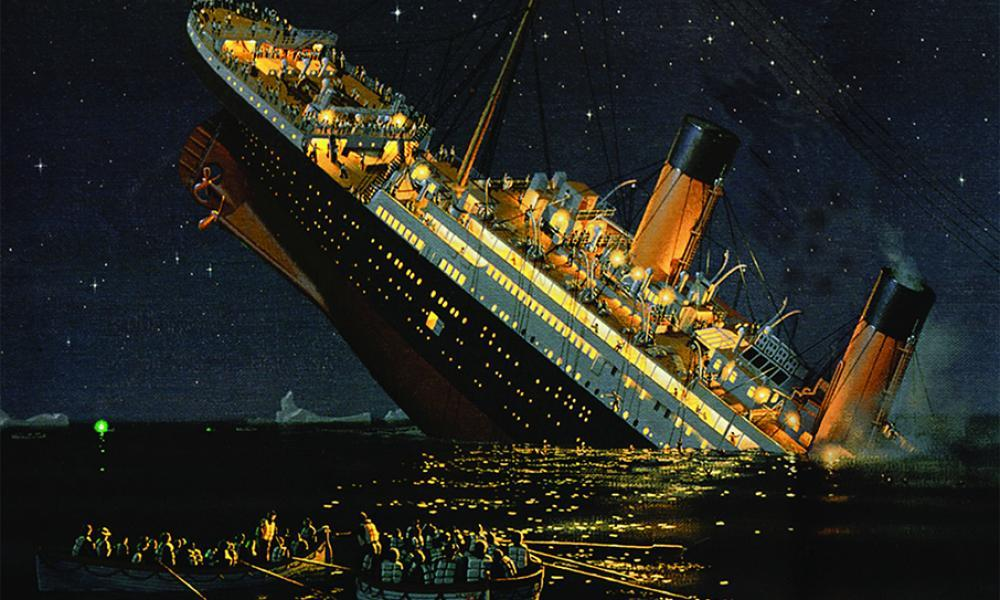

In [67]:
from IPython.display import Image
Image("/Users/name/Desktop/Kaggle/Titanic/titanic.jpg", width = 500, height = 300)

In [63]:
#load train, test dataset using Pandas
#The reason for using Pandas is that Pandas is tool for data cleaning and analysis
import pandas as pd

train = pd.read_csv('/Users/name/Desktop/Kaggle/Titanic/train.csv')
test = pd.read_csv('/Users/name/Desktop/Kaggle/Titanic/test.csv')

In [26]:
#printing first 5 rows of the train dataset
#Pclass is a class of passenger's seat
#1-> first class / 2-> second class
#SibSp -> siblings
#Parch -> parent + children
#Fares -> Price paid
#NaN -> no information
#Embarked -> location passengers take the ship

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
#891 passenger information, 12 feature information
train.shape

(891, 12)

In [29]:
test.shape

(418, 11)

In [30]:
#can find that some of the information is missing and still updating 
#For example, Age value is missing for many rows. It should be 891, but it has only 714 rows
#Similarly, Cabin values are also missing -> should be improved by using feature engineering
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
#shows the number of missing information
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
#Visualization part
import matplotlib.pyplot as plt

#this call is used to render any matplotlib diagrams even if the plt.show() function is not called
%matplotlib inline  
#this provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns 
sns.set() #setting seaborn. default for plots

In [38]:
#defining a function to minimize the repetitive process
#show the number of Survived and dead with a bar chart
#this function shows whether a passenger is survived or not based on the feature given
def bar_chart(feature):
    Survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([Survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

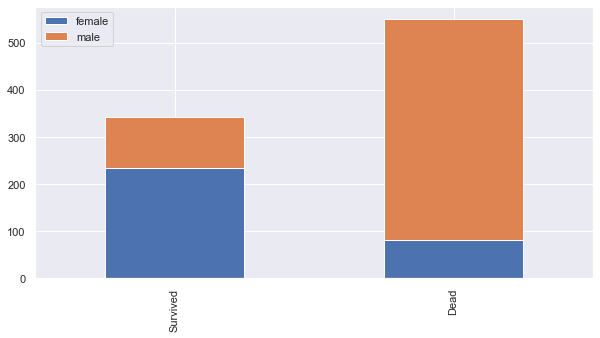

In [39]:
#This bar charts show that Women are more likely to survive than Men
bar_chart('Sex')

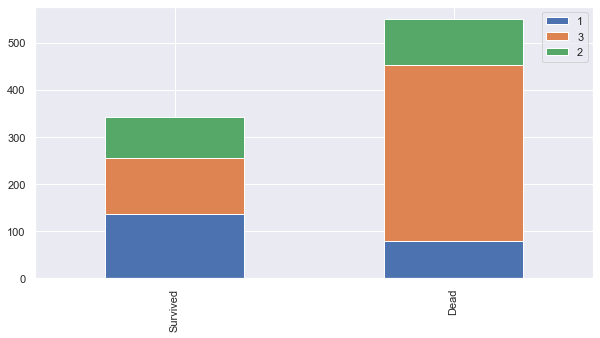

In [40]:
#This chart shows that 1st class passengers more likely survived than other classes
#and 3 class passengers more likely dead than other classes
bar_chart('Pclass')

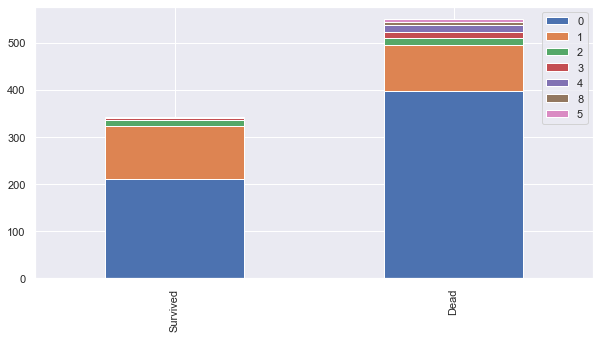

In [41]:
#this chart shows that a passenger more likely dead when alone
bar_chart('SibSp')

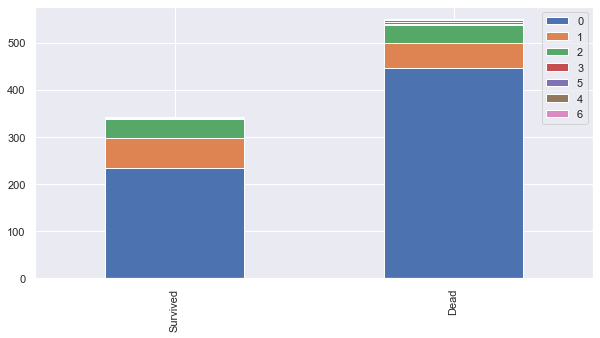

In [42]:
#this chart shows a passenger aborded with more than 2 parents or children more likely survived
bar_chart('Parch')

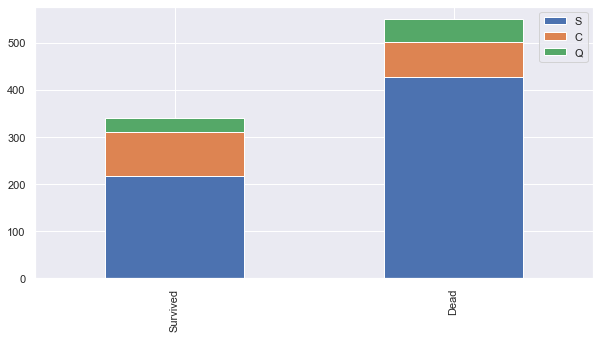

In [43]:
#this chart shows not enough information for making hypothesis
#since the number of survived and dead passengers from S location happens at the same time
bar_chart('Embarked')

**This notebook is created by learning from the following notebooks:**
- https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb